## Librairies

In [4]:
import zipfile
from ctypes import sizeof
import csv
import pandas as pd
import matplotlib.pyplot as plt

# Code pour carte SD
À rouler avant le reste

In [5]:
def extract_txtFolders (foldername):
  file_list = []
  with zipfile.ZipFile(foldername,'r') as zip_file:
    file_list = zip_file.namelist()

    return file_list


In [6]:
def separate1txttocolumns(foldername):
  Date = []
  Time = []
  Gen_status = []
  Gen_freq = []
  Gen_volt = []
  Grid_status = []
  Grid_freq = []
  Grid_volt = []
  Input_current = []
  Input_VA = []
  Input_watt = []
  Output_freq = []
  Output_volt = []
  Output_current = []
  Output_VA = []
  Output_watt = []
  Battery_volt = []
  Battery_current = []
  External_current = []
  Battery_temperature = []
  Transformer_temperature = []
  Bus_bar_temperature = []
  Heat_sink_temperature = []
  Fan_speed = []
  Mode = []
  Error_code = []
  Charge_stage = []
  Event = []

  with zipfile.ZipFile(foldername,'r') as zip_file:
    fileList = extract_txtFolders (foldername)
    del fileList[-1]

    for files in fileList:
      with zip_file.open(files,'r') as myfile:
        content = myfile.readlines()
        Date_x = []
        Time_x = []
        Gen_status_x = []
        Gen_freq_x = []
        Gen_volt_x = []
        Grid_status_x = []
        Grid_freq_x = []
        Grid_volt_x = []
        Input_current_x = []
        Input_VA_x = []
        Input_watt_x = []
        Output_freq_x = []
        Output_volt_x = []
        Output_current_x = []
        Output_VA_x = []
        Output_watt_x = []
        Battery_volt_x = []
        Battery_current_x = []
        External_current_x = []
        Battery_temperature_x = []
        Transformer_temperature_x = []
        Bus_bar_temperature_x = []
        Heat_sink_temperature_x = []
        Fan_speed_x = []
        Mode_x = []
        Error_code_x = []
        Charge_stage_x = []
        Event_x = []

        for line in content:
          if line != b'EVO-2224 \r\n' and line != b'Date;Time;Gen status;Gen freq;Gen volt;Grid status;Grid freq;Grid volt;Input current;Input VA;Input watt;Output freq;Output volt;Output current;Output VA;Output watt;Battery volt;Battery current;External current;Battery temperature(C);Transformer temperature(C);Bus bar temperature(C);Heat sink temperature(C);Fan speed;Mode;Error code;Charge stage;Event;                                                                                                                                                \r\n':
            Date_x,Time_x,Gen_status_x,Gen_freq_x,Gen_volt_x,Grid_status_x,Grid_freq_x,Grid_volt_x,Input_current_x,Input_VA_x,Input_watt_x,Output_freq_x,Output_volt_x,Output_current_x,Output_VA_x,Output_watt_x,Battery_volt_x,Battery_current_x,External_current_x,Battery_temperature_x,Transformer_temperature_x,Bus_bar_temperature_x,Heat_sink_temperature_x,Fan_speed_x,Mode_x,Error_code_x,Charge_stage_x,Event_x = line.decode().split(';', 27)
            Date.append(Date_x)
            Time.append(Time_x)
            Gen_status.append(Gen_status_x)
            Gen_freq.append(Gen_freq_x)
            Gen_volt.append(Gen_volt_x)
            Grid_status.append(Grid_status_x)
            Grid_freq.append(Grid_freq_x)
            Grid_volt.append(Grid_volt_x)
            Input_current.append(Input_current_x)
            Input_VA.append(Input_VA_x)
            Input_watt.append(Input_watt_x)
            Output_freq.append(Output_freq_x)
            Output_volt.append(Output_volt_x)
            Output_current.append(Output_current_x)
            Output_VA.append(Output_VA_x)
            Output_watt.append(Output_watt_x)
            Battery_volt.append(Battery_volt_x)
            Battery_current.append(Battery_current_x)
            External_current.append(External_current_x)
            Battery_temperature.append(Battery_temperature_x)
            Transformer_temperature.append(Transformer_temperature_x)
            Bus_bar_temperature.append(Bus_bar_temperature_x)
            Heat_sink_temperature.append(Heat_sink_temperature_x)
            Fan_speed.append(Fan_speed_x)
            Mode.append(Mode_x)
            Error_code.append(Error_code_x)
            Charge_stage.append(Charge_stage_x)
            Event.append(Event_x)
          else:
            data = 0
  return [Date,Time,Input_current,Input_VA,Input_watt,Output_freq,Output_volt,Output_current,Output_watt,Battery_volt,Battery_current,External_current,Transformer_temperature,Bus_bar_temperature,Heat_sink_temperature,Fan_speed,Charge_stage]

# Code pour Thingsboard

In [30]:
def extract_thingsboard_data (zipname):
  # Get file list
  fileList = extract_txtFolders(zipname)

  # Open the zip
  myZip = zipfile.ZipFile(zipname,'r')

  data = []
  for myFile in fileList:
    data.append(pd.read_csv(myZip.open(myFile), sep=';'))
    data[-1]["Timestamp"] = pd.to_datetime(data[-1].loc[:, "Timestamp"], format='%Y/%m/%d %H:%M:%S')
    #print(data)
    #test = pd.to_datetime(data[-1].loc[:, "Timestamp"], format='%Y-%m-%d %H:%M:%S.%f')
    #print(test[0])
  return data

Code pour données météo NASA

In [31]:
def extract_NASA_data (zipname, filename):
  print()

  # Open the zip
  myZip = zipfile.ZipFile(zipname,'r')
  myFile = filename
  data = []
  data = pd.read_csv(myZip.open(myFile), sep=';')
  print(myFile)

  # find the index of "-END HEADER-"
  target_value = "-END HEADER-"
  index = data[data["-BEGIN HEADER-"] == target_value].index
  index_value = index.item()
  #print(index_value)

  # deleate the first rows that aren't data or column names
  info = data.iloc[:index_value+1]
  data.columns = data.iloc[index_value+1]
  column_names = data.columns.item()
  data = data.iloc[index_value + 2:]
  print(info)
  #print(data)

  # split data in multiple columns
  data_split = data[data.columns.item()].str.split(',', expand=True)
  data_split.columns = column_names.split(',')
  data_split.reset_index(drop=True, inplace=True)

  # Ajout de la colonne 'timestamp'
  if data_split.columns[3] == 'HR':
    data_split['Timestamp'] = data_split['YEAR'] + '-' + data_split['MO'] + '-' + data_split['DY'] + ' ' + data_split['HR'] + ':00:00'
    data_split.drop(columns=['YEAR', 'MO', 'DY', 'HR'], inplace=True)
  else:
    data_split['Timestamp'] = data_split['YEAR'] + '-' + data_split['MO'] + '-' + data_split['DY'] + ' 00:00:00'
    data_split.drop(columns=['YEAR', 'MO', 'DY'], inplace=True)

  data_split = data_split[['Timestamp'] + [col for col in data_split if col != 'Timestamp']]
  data_split['Timestamp'] = pd.to_datetime(data_split['Timestamp'], format='%Y-%m-%d %H:%M:%S')
  #print(data_split)

  #table_value = data_split[data_split.columns[2]]
  #print(type(table_value.values[2]))

  column_names = data_split.columns.values
  for names in column_names:
    if names != 'Timestamp':
      data_split[names] = data_split[names].astype(float)

  return data_split

# Main
À rouler en dernier.

**!! Ne pas oublier de drag and drop les fichiers zip dans l'espace de travail a gauce !!**

In [32]:
#AGRUM.iopub_data_rate_limit=10000000.0
# This is the main

# Extraction des pts txt de la carte SD
# folderNameMain = 'Periode1.zip'
# MAJORDATA = separate1txttocolumns(folderNameMain)

# Extraction des .csv de Thingsboard
noLoad = '14_au_17_oct-Pas_de_lampe_chauffante.zip'
withLoad = 'Matin_20_oct-Avec_lampe_chauffante.zip'
meteo_NASA = 'Donnees_meteo_NASA.zip'
noLoad_data = extract_thingsboard_data(noLoad)
withLoad_data = extract_thingsboard_data(withLoad)

fileList = extract_txtFolders(meteo_NASA)
meteo_data_0 = extract_NASA_data(meteo_NASA, fileList[0])
meteo_data_1 = extract_NASA_data(meteo_NASA, fileList[1])
meteo_data_2 = extract_NASA_data(meteo_NASA, fileList[2])
meteo_data_3 = extract_NASA_data(meteo_NASA, fileList[3])
meteo_data_4 = extract_NASA_data(meteo_NASA, fileList[4])
print()

# Affichage des nom des headers
for i in range(len(noLoad_data)):
  print(i, noLoad_data[i].columns.values)
print()

# Affichage des nom des headers
#for i in range(len(meteo_data)):
#  print(i, meteo_data[i].columns.values)
#print()


Irradiance_Daily_20221021_20231020.csv
                                       -BEGIN HEADER-
0   NASA/POWER CERES/MERRA2 Native Resolution Dail...
1   Dates (month/day/year): 10/21/2022 through 10/...
2   Location: Latitude  45.5312   Longitude -73.5181 
3   Elevation from MERRA-2: Average for 0.5 x 0.62...
4   The value for missing source data that cannot ...
5                                      Parameter(s): 
6   ALLSKY_SFC_SW_DWN     CERES SYN1deg All Sky Su...
7   CLRSKY_SFC_SW_DWN     CERES SYN1deg Clear Sky ...
8   ALLSKY_KT             CERES SYN1deg All Sky In...
9   ALLSKY_SFC_LW_DWN     CERES SYN1deg All Sky Su...
10                                       -END HEADER-

Temperature-humidity-precipitation_Daily_20221021_20231020.csv
                                       -BEGIN HEADER-
0   NASA/POWER CERES/MERRA2 Native Resolution Dail...
1   Dates (month/day/year): 10/21/2022 through 10/...
2   Location: Latitude  45.5312   Longitude -73.5181 
3   Elevation from MERRA-2: Aver

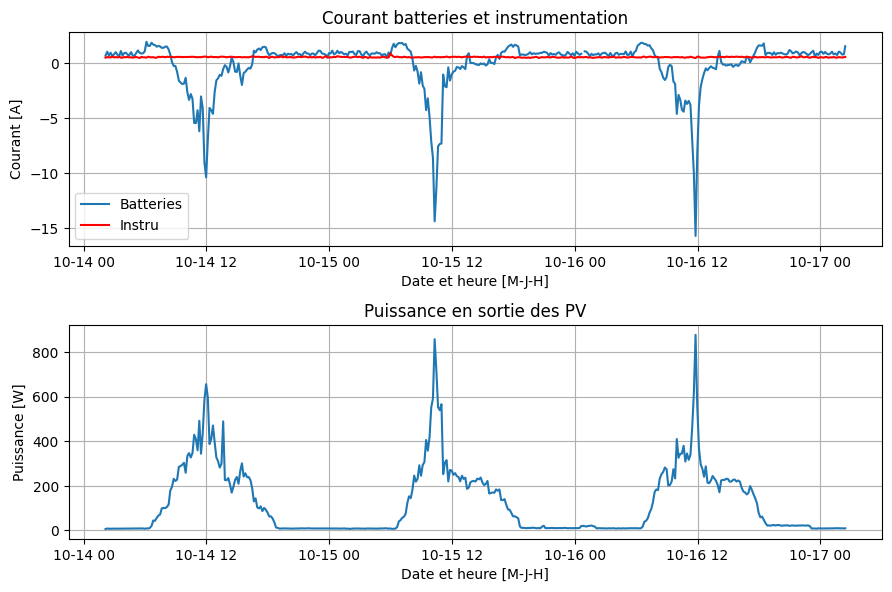

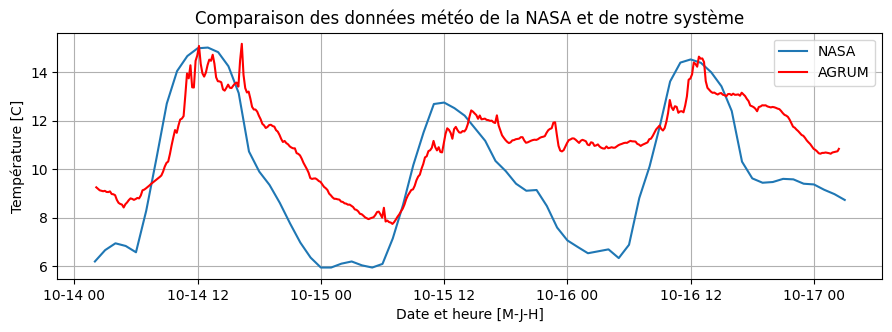

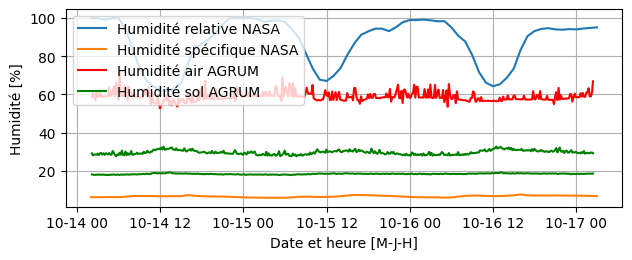

In [33]:
# Exemple de plot
plt.figure(figsize=(9,6))
plt.subplot(2, 1, 1)
plt.plot(noLoad_data[0]["Timestamp"], noLoad_data[0]["Sortie Batteries"], label="Batteries")
plt.plot(noLoad_data[0]["Timestamp"], noLoad_data[0]["Entree Instrumentation"], label="Instru", color='red')
plt.title('Courant batteries et instrumentation')
plt.grid(True)
plt.legend()
plt.ylabel("Courant [A]")
plt.xlabel("Date et heure [M-J-H]")

plt.subplot(2, 1, 2)
plt.plot(noLoad_data[4]["Timestamp"], noLoad_data[4]["Puissance PV"])
plt.title('Puissance en sortie des PV')
plt.grid(True)
plt.ylabel("Puissance [W]")
plt.xlabel("Date et heure [M-J-H]")
plt.tight_layout(pad=1.0)
plt.show()

# Filter the DataFrame based on the time range
start_time = '2023-10-14 02:00:00'
end_time = '2023-10-17 03:00:00'
filtered_meteo_data_2 = meteo_data_2[(meteo_data_2['Timestamp'] >= start_time) & (meteo_data_2['Timestamp'] <= end_time)]

plt.figure(figsize=(9,6))
plt.subplot(2, 1, 1)
plt.plot(filtered_meteo_data_2["Timestamp"], filtered_meteo_data_2["T2M"], label="NASA")
plt.plot(noLoad_data[5]["Timestamp"], noLoad_data[5]["Temperature avec PV"], label="AGRUM", color='red')
plt.title('Comparaison des données météo de la NASA et de notre système')
plt.grid(True)
plt.ylabel("Température [C]")
plt.xlabel("Date et heure [M-J-H]")
plt.tight_layout(pad=1.0)
plt.legend()
plt.show()

plt.subplot(2, 1, 2)
plt.plot(filtered_meteo_data_2["Timestamp"], filtered_meteo_data_2["RH2M"], label="Humidité relative NASA")
plt.plot(filtered_meteo_data_2["Timestamp"], filtered_meteo_data_2["QV2M"], label="Humidité spécifique NASA")
plt.plot(noLoad_data[3]["Timestamp"], noLoad_data[3]["Humidite avec PV"], label="Humidité air AGRUM", color='red')
plt.plot(noLoad_data[2]["Timestamp"], noLoad_data[2]["Humidite sol 2"], label="Humidité sol AGRUM", color='green')
plt.plot(noLoad_data[2]["Timestamp"], noLoad_data[2]["Humidite sol 3"], color='green')
plt.grid(True)
plt.ylabel("Humidité [%]")
plt.xlabel("Date et heure [M-J-H]")
plt.tight_layout(pad=1.0)
plt.legend()
plt.show()
